# Demo for Shearmaps

#### Spencer Everett, SLAC 2015

Import necessary packages.

In [1]:
from pangloss import *
import numpy as np
import scipy as sp
import cmath
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

First create a Shearmap object. Like Kappama, the Shearmap class is a subclass of WLMap but requires two file inputs; one file for each component of the complex shear. The files $\textit{must}$ be passed in a list (unlike a Kappamap file, it is automatically converted) and must be in order (first the .gamma1 file, then the .gamma2 file). As before, the optional second argument is set to 'FITS = false' as the file has yet to be converted to .fits.

In [3]:
S = Shearmap(['data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1','data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

A Shearmap object is currently two separate maps: gamma1 and gamma2. Each map attribute is now stored as a list, with the first and second entry corresponding to gamma1 and gamma2 (Maybe change this, do we really need two versions of the same data?). For example, 

In [4]:
S.values[0] # The shearmap values for the gamma1 map

array([[  5.60115930e-03,   6.39436534e-03,   6.40015723e-03, ...,
         -2.20925122e-05,  -8.27380689e-04,   1.34383084e-03],
       [ -1.57251168e-04,   1.87345629e-03,   2.25435290e-03, ...,
         -3.09474417e-03,  -4.20970842e-03,  -9.02319269e-04],
       [ -3.86622665e-03,  -1.28266669e-03,   2.61628738e-04, ...,
         -5.16812131e-03,  -7.13164080e-03,  -2.03410280e-03],
       ..., 
       [  3.13768983e-02,   3.53595652e-02,   3.44255455e-02, ...,
         -5.15447231e-03,   1.02778722e-03,  -1.44818809e-03],
       [  3.02359760e-02,   3.53406854e-02,   3.70858125e-02, ...,
         -8.09114368e-04,   2.33800570e-03,  -1.16832973e-03],
       [  2.70190202e-02,   2.80189943e-02,   1.89315286e-02, ...,
         -3.63504468e-03,   1.03648286e-03,   2.06721551e-03]], dtype=float32)

In [5]:
S.values[1] # The shearmap values for the gamma2 map

array([[-0.04114537, -0.03823771, -0.03450574, ..., -0.00924038,
        -0.00435786,  0.00041931],
       [-0.04342448, -0.03918865, -0.03567995, ..., -0.01350109,
        -0.00570752,  0.00086826],
       [-0.04252999, -0.03922154, -0.03604227, ..., -0.01565584,
        -0.00725669,  0.00176763],
       ..., 
       [ 0.00355339, -0.00443153, -0.02298716, ..., -0.00507053,
        -0.00907261, -0.01196655],
       [ 0.01031568,  0.01171172,  0.01396914, ..., -0.01014063,
        -0.01085359, -0.01317145],
       [ 0.01468208,  0.0207901 ,  0.03035841, ..., -0.01330485,
        -0.01293556, -0.01289561]], dtype=float32)

If the files have .gamma1 and .gamma2 extensions, the attributes are set automatically in WLMap. A few of the important attributes set for the maps are:

Field Size (self.field): 4 deg x 4 deg  

Number of Pixels (self.NX*self.NX): 4096 x 4096

Pixel-scale (self.PIXSCALE): 4 deg / 4096 = 0.000977 deg/pix

Output (self.output): ['data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits',
'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits']

The at() method works similarly for a Shearmap, but a third argument now specifies which map (gamma1 or gamma2) the method will extract from.

In [6]:
S.at(0,0,0) # gamma1 value at )0,0)

-0.05564130749553442

In [7]:
S.at(0,0,1) # gamma2 value at (0,0)

-0.0033700582571327686

Note that if no third argument is passed, the method defaults to the first map (i.e. 0).

In [8]:
S.at(0,0)

-0.05564130749553442

The plot() method for a Shearmap is quite different (Explain details and small derivation of complex gamma, etc).

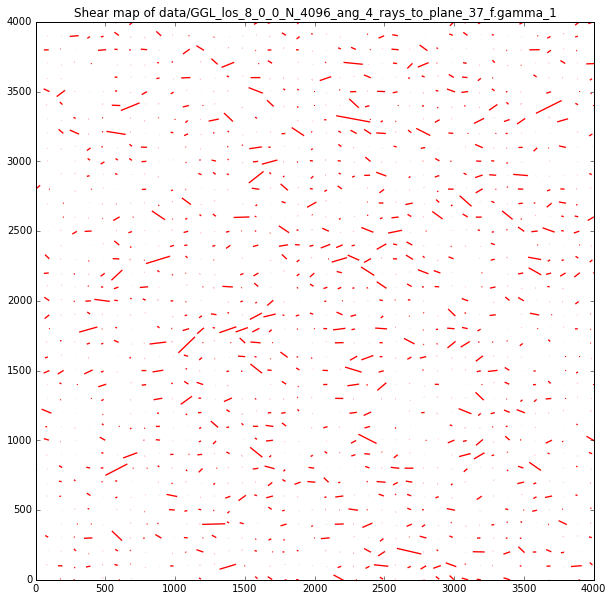

In [9]:
S.plot()

Resizing the image is the same as with Kappamap, simply pass one argument with the desired figure size in inches.

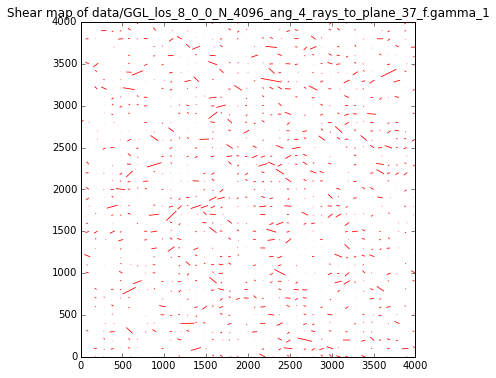

In [10]:
S.plot(6)

(Make subplot work!!)

(Maybe add sampling rate as optional argument??)

In [11]:
X,Y = np.meshgrid(np.arange(0,S1.NX[0]),np.arange(0,S1.NX[0]))
X = X[::N,::N]
Y = Y[::N,::N]

NameError: name 'S1' is not defined

In [ ]:
mod_gamma = np.sqrt(np.square(gamma1)+np.square(gamma2))
phi_gamma = np.arctan(np.divide(gamma2,gamma1))/2.0

#Gamma = np.multiply(mod_gamma,np.cos(2*arg_gamma)+1j*np.sin(2*arg_gamma))
#Gamma1 = np.real(Gamma)
#Gamma2 = np.imag(Gamma)

stick1 = np.multiply(mod_gamma,np.cos(phi_gamma))
stick2 = np.multiply(mod_gamma,np.sin(phi_gamma))

In [ ]:
plt.quiver(X,Y,stick1[::N,::N],stick2[::N,::N],color='r',headwidth = 0,pivot='middle')
fig = plt.gcf()
fig.set_size_inches(12,12)